In [196]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import r2_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.preprocessing import Normalizer

In [163]:
#loading in the data
df = pd.read_csv('data/data_clean.csv')
#df.head(10)

In [164]:
df.columns

Index(['Unnamed: 0', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [166]:
df.columns = df.columns.str.replace(' ', '_')

In [156]:
df.shape

(3333, 19)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed:_0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

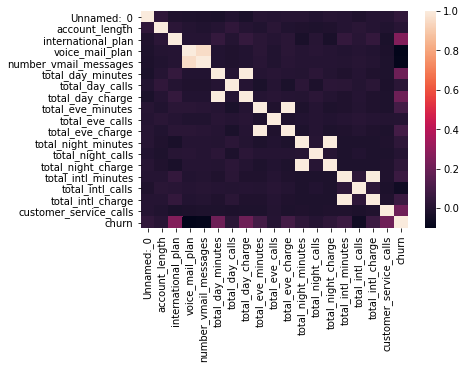

In [168]:
df.corr()
sns.heatmap(df.corr());

In [169]:
corrs = df.corr().abs()['churn'].sort_values(ascending=False).drop('churn')
ordered_corrs = corrs.index
ordered_corrs

Index(['international_plan', 'customer_service_calls', 'total_day_minutes',
       'total_day_charge', 'voice_mail_plan', 'total_eve_minutes',
       'total_eve_charge', 'number_vmail_messages', 'total_intl_charge',
       'total_intl_minutes', 'total_intl_calls', 'Unnamed:_0',
       'total_night_charge', 'total_night_minutes', 'total_day_calls',
       'account_length', 'total_eve_calls', 'total_night_calls'],
      dtype='object')

In [171]:
df = df.drop('number_vmail_messages', axis=1)
df = df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)
df = df.drop('Unnamed:_0', axis=1)

In [172]:
y = df['churn']
X = df.drop('churn', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69)

dummy_model = DummyClassifier(strategy='most_frequent', random_state=69)
dummy_model.fit(X_train,y_train)
dummy_model.score(X_test,y_test)

0.8477218225419664

In [173]:
#from imblearn.over_sampling import SMOTE
#print('Original class distribution: \n')
#print(y.value_counts())
#smote = SMOTE()
#X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
#print('-----------------------------------------')
#print('Synthetic sample class distribution: \n')
#print(pd.Series(y_train_resampled).value_counts()) 

In [174]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [175]:
log_reg = LogisticRegression(max_iter = 1000, random_state=69)
log_reg.fit(X_train_scaled, y_train)
log_reg.score(X_test_scaled,y_test)

0.8585131894484412

In [176]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

log_reg = LogisticRegression(random_state=69)
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

print(rfe.n_features_)
print(rfe.ranking_)


5
[7 1 1 1 5 1 6 4 8 3 2 1]


In [177]:
df.head()
fet_df = df.drop(['account_length', 'total_day_calls', 'total_eve_calls', 'total_night_minutes', 'total_night_calls','total_intl_minutes','total_intl_calls'], axis=1)

# Logistic Regs

In [178]:
y = fet_df['churn']
X = fet_df.drop('churn', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
log_reg = LogisticRegression(random_state=69)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict()


LogisticRegression(random_state=69)

In [179]:
cross_val_score(log_reg, X_train_scaled, y_train, cv=5).mean()

0.856745490981964

In [180]:
log_reg.score(X_test_scaled,y_test)

0.86810551558753

In [181]:
param_grid = {
    'max_iter': [100,1000,5000,10000],
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'C': [0.001,0.009,0.01,0.09,1,5,10,25],
    'class_weight': ['None', 'balanced']

}

gs_log = GridSearchCV(log_reg, param_grid, cv=5)
gs_log.fit(X_train_scaled, y_train)

print(gs_log.best_estimator_.score(X_test_scaled, y_test))
gs_log.best_estimator_

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_se

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_se

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

0.8609112709832134


D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-p

LogisticRegression(C=0.009, class_weight='None', random_state=69)

# Trees

In [182]:
tree_model = DecisionTreeClassifier(random_state=69)
tree_model.fit(X_train_scaled, y_train)
print(cross_val_score(tree_model,X_train_scaled,y_train).mean())
tree_model.score(X_test_scaled, y_test)

0.8795462925851704


0.8896882494004796

In [183]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(tree_model, param_grid, cv=5)
gs_tree.fit(X_train_scaled, y_train)

gs_tree.best_estimator_()(X_test_scaled, y_test)

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit fai

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit fai

D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit fai

0.9112709832134293

In [184]:
tree_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=69)
tree_model.fit(X_train_scaled, y_train)
print(cross_val_score(tree_model,X_train_scaled,y_train).mean())
tree_model.score(X_test_scaled, y_test)

0.8987519038076153


0.9064748201438849

# Naive Bayes

In [223]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
print(cross_val_score(naive_bayes,X_train_scaled,y_train).mean())
naive_bayes.score(X_test_scaled, y_test)
y_pred = naive_bayes.predict(X_test_scaled)
f1_score(y_test, y_pred)

0.8559430861723447


0.0

# K Nearest Neighbors

In [222]:
state_farm_model = KNeighborsClassifier()
state_farm_model.fit(X_train_scaled, y_train)
print(cross_val_score(state_farm_model,X_train_scaled,y_train).mean())
state_farm_model.score(X_test_scaled, y_test)
y_pred = state_farm_model.predict(X_test_scaled)
f1_score(y_test, y_pred)

0.8391382765531062


0.052980132450331126

In [187]:
param_grid = {
    'n_neighbors': [17,19,21,27],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}

gs_knn = GridSearchCV(state_farm_model, param_grid, cv=5)
gs_knn.fit(X_train_scaled, y_train)

gs_knn.best_estimator_.score(X_test_scaled, y_test)
gs_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=17, weights='distance')

### Reducing Variables

In [188]:
feats = ['international_plan','customer_service_calls','total_day_minutes','total_eve_minutes']
knn_x = df[feats]
X_train_knn, X_test_knn, y_train, y_test = train_test_split(knn_x,y, random_state=69)
normal = Normalizer()
X_train_knn_normal = normal.transform(X_train_knn)
X_test_knn_normal = normal.transform(X_test_knn)
knn = KNeighborsClassifier()

knn.fit(X_train_knn_normal,y_train)
print(cross_val_score(knn,X_train_scaled,y_train).mean())
knn.score(X_test_knn_normal, y_test)


0.8391382765531062


0.8441247002398081

## Finding Feture combinations

In [189]:
ordered_corrs = list(ordered_corrs)
for i in range(1, len(ordered_corrs)):
    var = ordered_corrs[:i]
    knn_x = df[var]
    X_train_knn, X_test_knn, y_train, y_test = train_test_split(knn_x,y, random_state=69)
    normal = Normalizer()
    X_train_knn_normal = normal.transform(X_train_knn)
    X_test_knn_normal = normal.transform(X_test_knn)
    knn = KNeighborsClassifier()
    knn.fit(X_train_knn_normal,y_train)
    print(f'This the basic Knn model with {var}')
    print(f'Train:',cross_val_score(knn,X_train_scaled,y_train).mean())
    print(f'Test:',knn.score(X_test_knn_normal, y_test))


This the basic Knn model with ['international_plan']
Train: 0.8391382765531062
Test: 0.842925659472422
This the basic Knn model with ['international_plan', 'customer_service_calls']
Train: 0.8391382765531062
Test: 0.8441247002398081
This the basic Knn model with ['international_plan', 'customer_service_calls', 'total_day_minutes']
Train: 0.8391382765531062
Test: 0.8501199040767387


KeyError: "['total_day_charge'] not in index"

In [192]:
ordered_corrs

['international_plan',
 'customer_service_calls',
 'total_day_minutes',
 'total_day_charge',
 'voice_mail_plan',
 'total_eve_minutes',
 'total_eve_charge',
 'number_vmail_messages',
 'total_intl_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'Unnamed:_0',
 'total_night_charge',
 'total_night_minutes',
 'total_day_calls',
 'account_length',
 'total_eve_calls',
 'total_night_calls']

# Random Forest

In [221]:
forest = RandomForestClassifier(random_state=69)
forest.fit(X_train_scaled, y_train)
print(cross_val_score(forest,X_train_scaled,y_train).mean())
forest.score(X_test_scaled, y_test)
y_pred =  forest.predict(X_train_scaled)
f1_score(y_test,y_pred)

0.837939879759519


ValueError: Found input variables with inconsistent numbers of samples: [834, 2499]

## desicion tree baseline model

In [219]:
#we picked total night calls because it has the lowest corr

X_baseline = df[['total_night_calls']]
tree_model = DecisionTreeClassifier(class_weight='balanced',random_state=69)
X_train_baseline, X_test_baseline, y_train, y_test = train_test_split(X_baseline,y, random_state=69)
tree_model.fit(X_train_baseline, y_train)
print(cross_val_score(tree_model,X_train_baseline,y_train).mean())
#tree_model.score(X_test_baseline, y_test)
y_pred = tree_model.predict(X_test_baseline)
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(y_test)
print(y_pred)

0.5002100200400801
0.2230769230769231
0.4566929133858268
0.1475826972010178
2909    0
2438    0
2150    1
2882    1
1161    0
       ..
295     0
282     0
3073    0
2402    1
2460    0
Name: churn, Length: 834, dtype: int64
[1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0
 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 

# FP and FN notes

We would rather have more false positives rather than False negatives because we can afford to have a false positive because we would be loosing less money if we identified someone is going to churn and gave them a small discount to keep them as a customer vs missing a customer who is going to churn and loosing their buisness completly